#### 1. Load and Explore the Combined Data
Load the Parquet file and perform exploratory data analysis (EDA) to understand the structure and behavior of the data over the 5-day period.
Check for trends, seasonality, missing values, and outliers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the combined parquet data

file_path = '/Users/maushariff/Downloads/Local_Disk_E/Byrav/Internet2_Data/Atla/combined_internet_traffic_data.parquet'
df = pd.read_parquet(file_path)

In [ ]:
# Display basic information and initial rows of the data
print(df.info())
print(df.head())

# Descriptive statistics to understand the range and distribution of your numeric columns
print(df.describe())

# Check for any missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22284871 entries, 0 to 22284870
Data columns (total 22 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   export_sysid  int64 
 1   t_first       object
 2   t_last        object
 3   proto         int64 
 4   src4_addr     object
 5   dst4_addr     object
 6   src_port      int64 
 7   dst_port      int64 
 8   src_tos       int64 
 9   dst_tos       int64 
 10  in_packets    int64 
 11  input_snmp    int64 
 12  output_snmp   int64 
 13  src_as        int64 
 14  dst_as        int64 
 15  src_mask      int64 
 16  dst_mask      int64 
 17  ip4_next_hop  object
 18  ip4_router    object
 19  src6_addr     object
 20  dst6_addr     object
 21  ip6_next_hop  object
dtypes: int64(13), object(9)
memory usage: 3.7+ GB
None
   export_sysid                  t_first                   t_last  proto  \
0             6  2021-11-04T00:00:15.104  2021-11-04T00:02:46.400     17   
1            56  2021-11-04T00:04:45.696  2021-11-04T

: 

In [4]:

# Example: Plotting number of packets over time (assuming 't_first' and 'in_packets' are in your data)
df['t_first'] = pd.to_datetime(df['t_first'])  # Convert to datetime if not already
df.set_index('t_first', inplace=True)

/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_24814/65645786.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['in_packets'].resample('H').sum().plot(title='Hourly Traffic Volume')  # Example: resample by hour


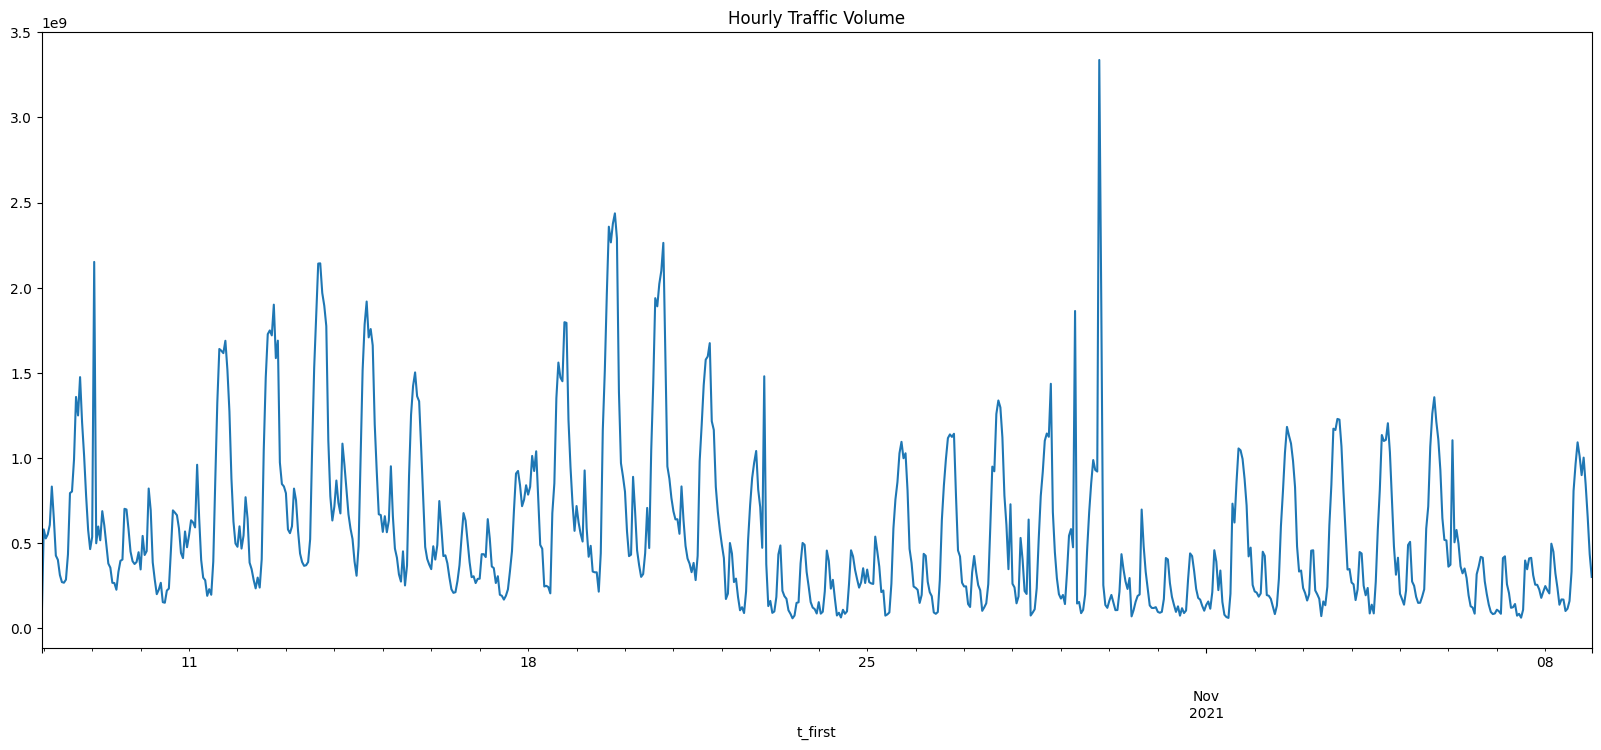

In [5]:
# Adjust the size of the plot
plt.figure(figsize=(20, 8))  # Width, Height in inches

df['in_packets'].resample('H').sum().plot(title='Hourly Traffic Volume')  # Example: resample by hour

# Show the plot
plt.show()

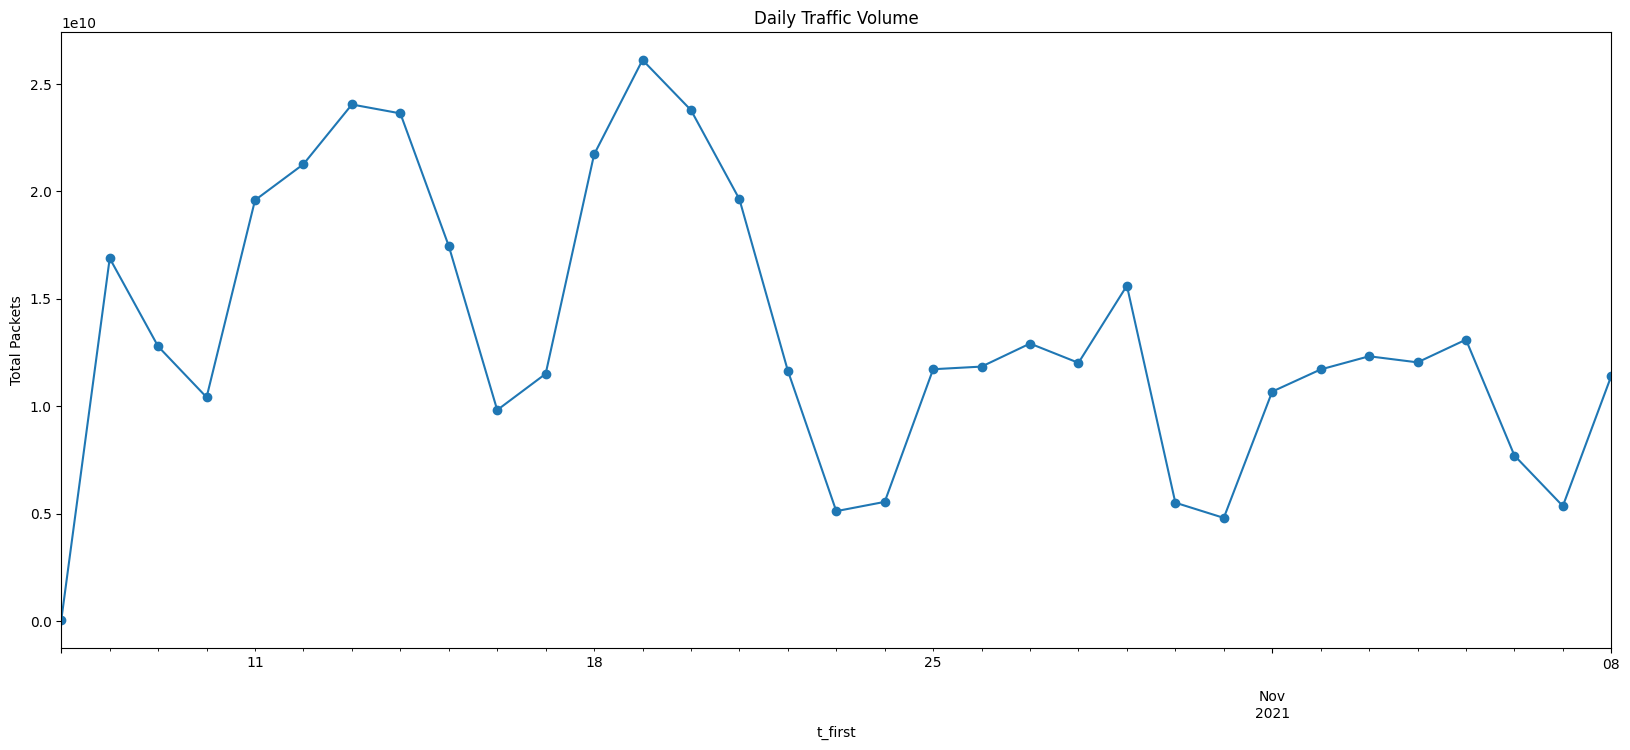

In [6]:
# Plot daily traffic volume
plt.figure(figsize=(20, 8))
df['in_packets'].resample('D').sum().plot(title='Daily Traffic Volume', marker='o')  # 'D' for daily resampling
plt.ylabel('Total Packets')
plt.show()


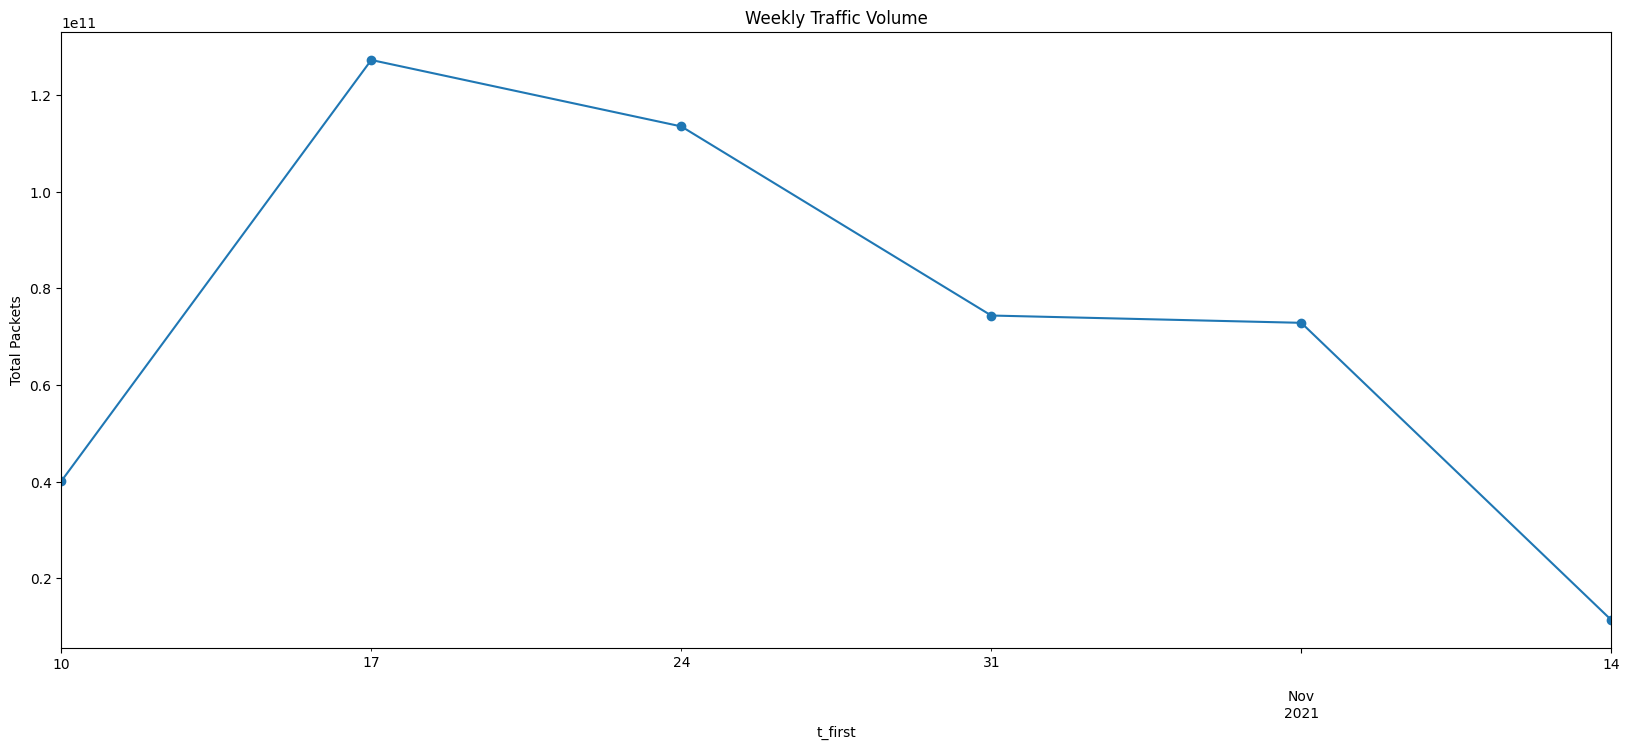

In [7]:
# Plot weekly traffic volume
plt.figure(figsize=(20, 8))
df['in_packets'].resample('W').sum().plot(title='Weekly Traffic Volume', marker='o')  # 'W' for weekly resampling
plt.ylabel('Total Packets')
plt.show()


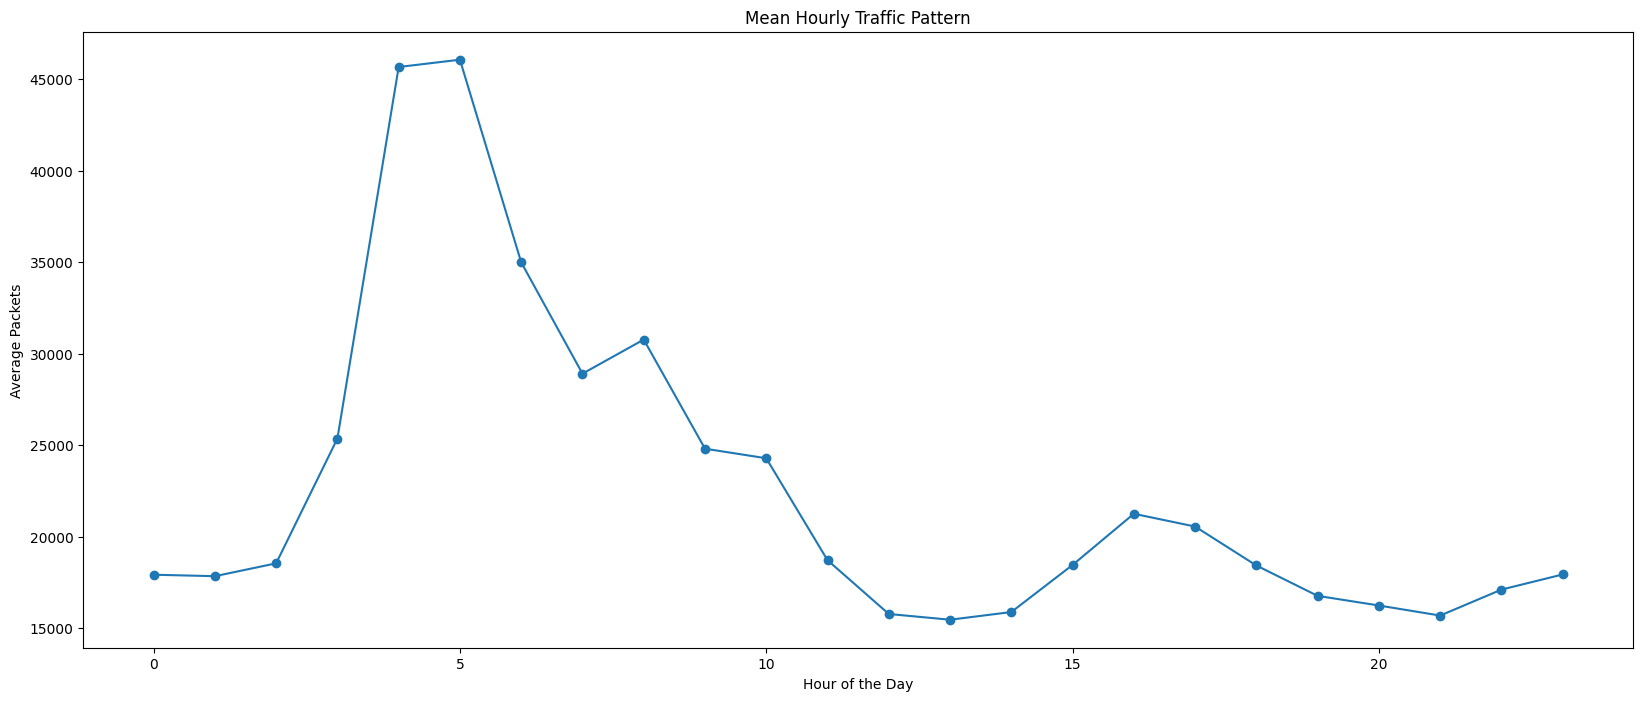

In [8]:
# Create a column for hour of the day
df['hour'] = df.index.hour

# Plot mean traffic for each hour of the day
plt.figure(figsize=(20, 8))
df.groupby('hour')['in_packets'].mean().plot(title='Mean Hourly Traffic Pattern', marker='o')
plt.ylabel('Average Packets')
plt.xlabel('Hour of the Day')
plt.show()


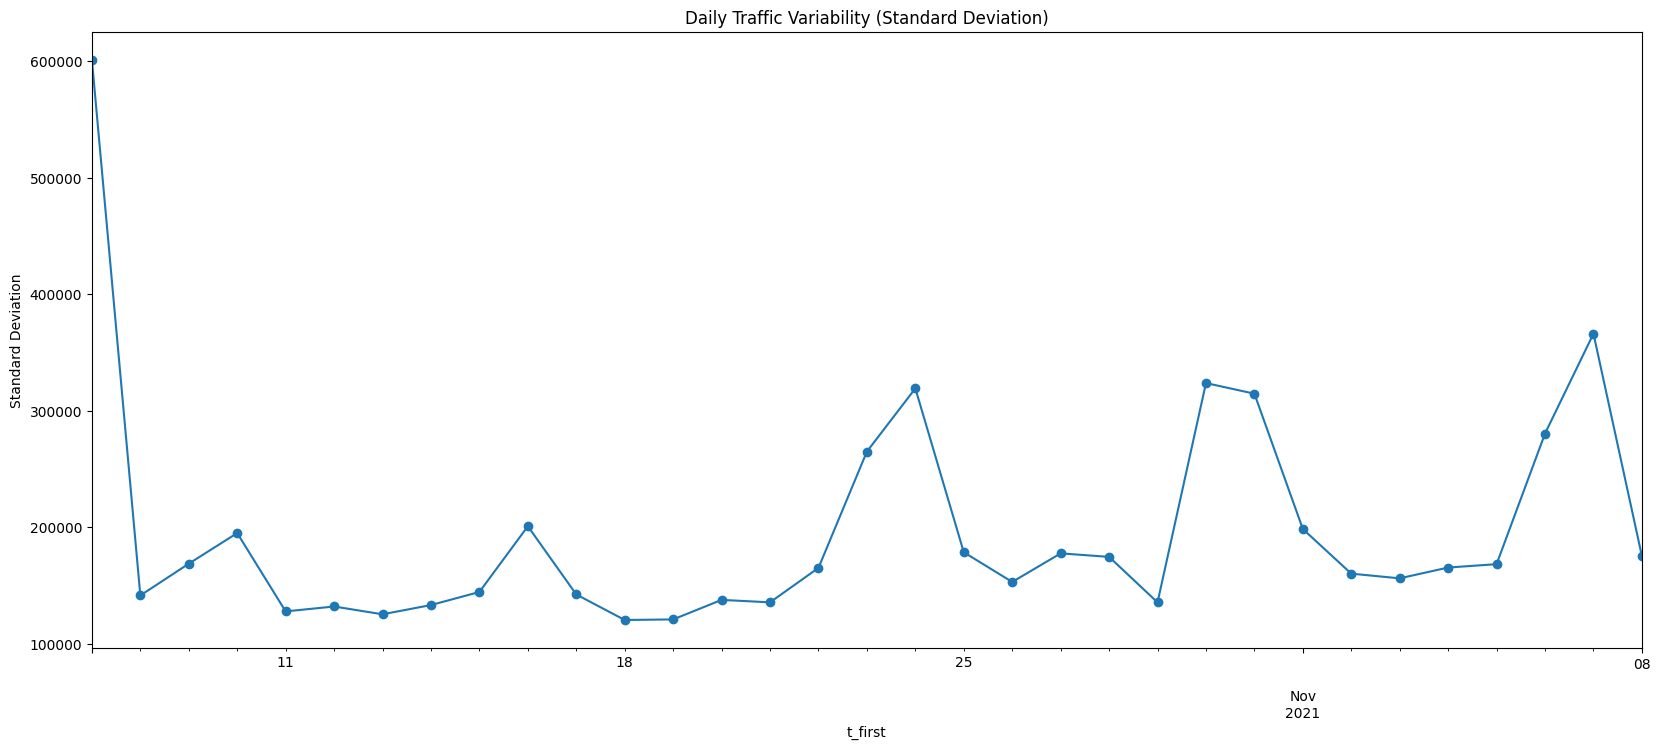

In [9]:
# Plot standard deviation of daily traffic
plt.figure(figsize=(20, 8))
df['in_packets'].resample('D').std().plot(title='Daily Traffic Variability (Standard Deviation)', marker='o')
plt.ylabel('Standard Deviation')
plt.show()


/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_24814/3293152686.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_mean = df['in_packets'].resample('H').sum().rolling(window=24).mean()  # 24-hour rolling mean
/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_24814/3293152686.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_std = df['in_packets'].resample('H').sum().rolling(window=24).std()   # 24-hour rolling std


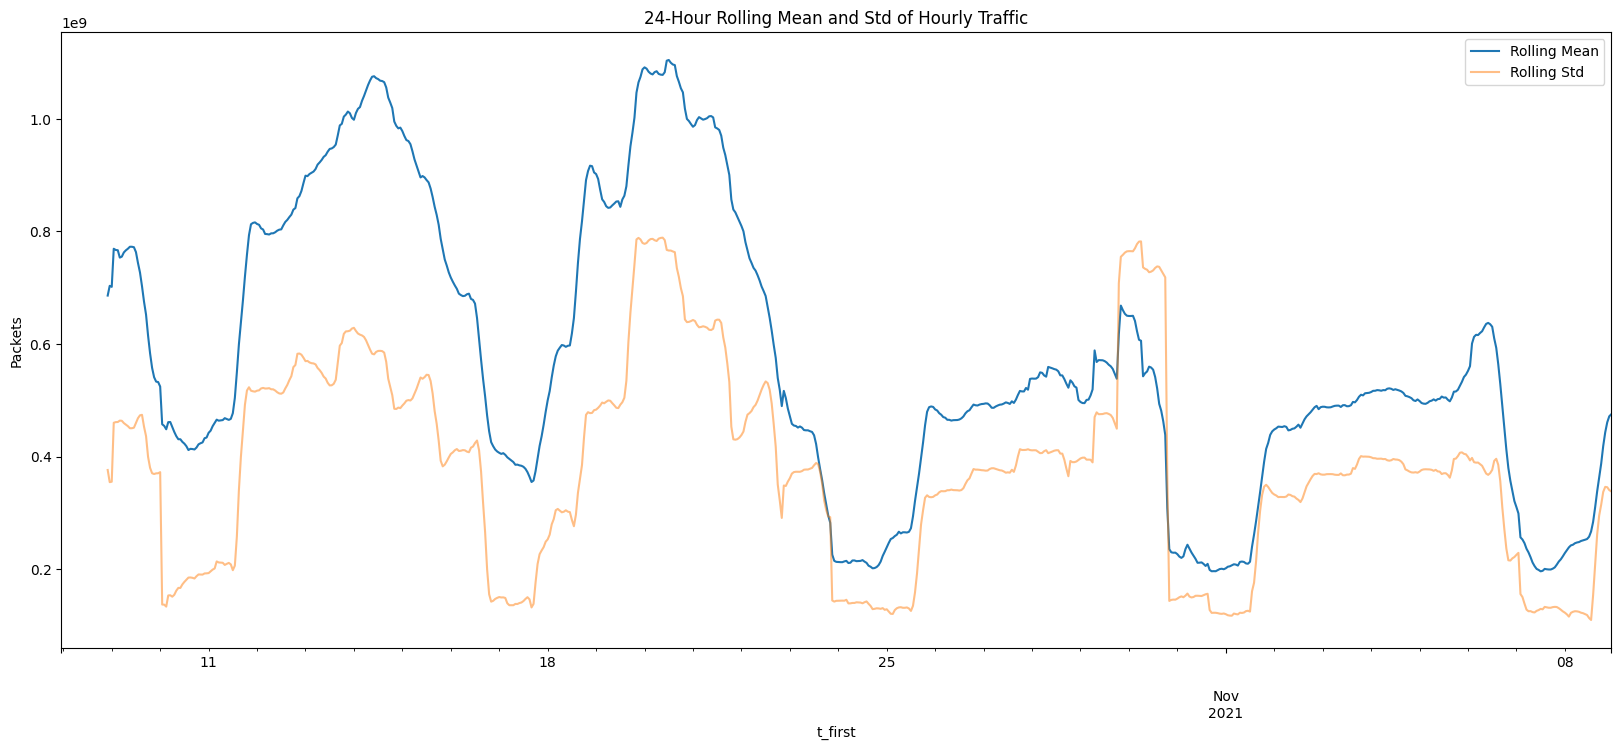

In [10]:
# Calculate rolling mean and std
rolling_mean = df['in_packets'].resample('H').sum().rolling(window=24).mean()  # 24-hour rolling mean
rolling_std = df['in_packets'].resample('H').sum().rolling(window=24).std()   # 24-hour rolling std

# Plot rolling mean and standard deviation
plt.figure(figsize=(20, 8))
rolling_mean.plot(label='Rolling Mean')
rolling_std.plot(label='Rolling Std', alpha=0.5)
plt.title('24-Hour Rolling Mean and Std of Hourly Traffic')
plt.ylabel('Packets')
plt.legend()
plt.show()


/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_24814/2811904654.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['in_packets'].resample('H').sum()


t_first
2021-10-07 23:00:00     49965000
2021-10-08 00:00:00    581615000
2021-10-08 01:00:00    528560000
2021-10-08 02:00:00    552650000
2021-10-08 03:00:00    607955000
Freq: h, Name: in_packets, dtype: int64


<Axes: title={'center': 'Aggregated Hourly Traffic Volume'}, xlabel='t_first'>

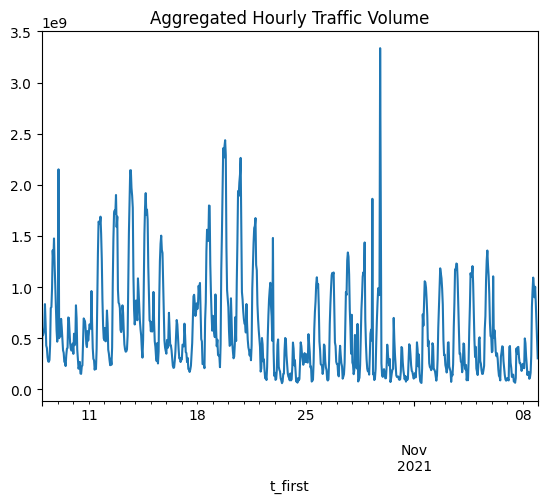

In [11]:
# Aggregate the data by summing the 'in_packets' at hourly intervals
hourly_data = df['in_packets'].resample('H').sum()

# Check the resampled hourly data
print(hourly_data.head())

# Plot the aggregated hourly data
hourly_data.plot(title='Aggregated Hourly Traffic Volume')


/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_24814/2650750954.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['in_packets'].resample('H').sum()


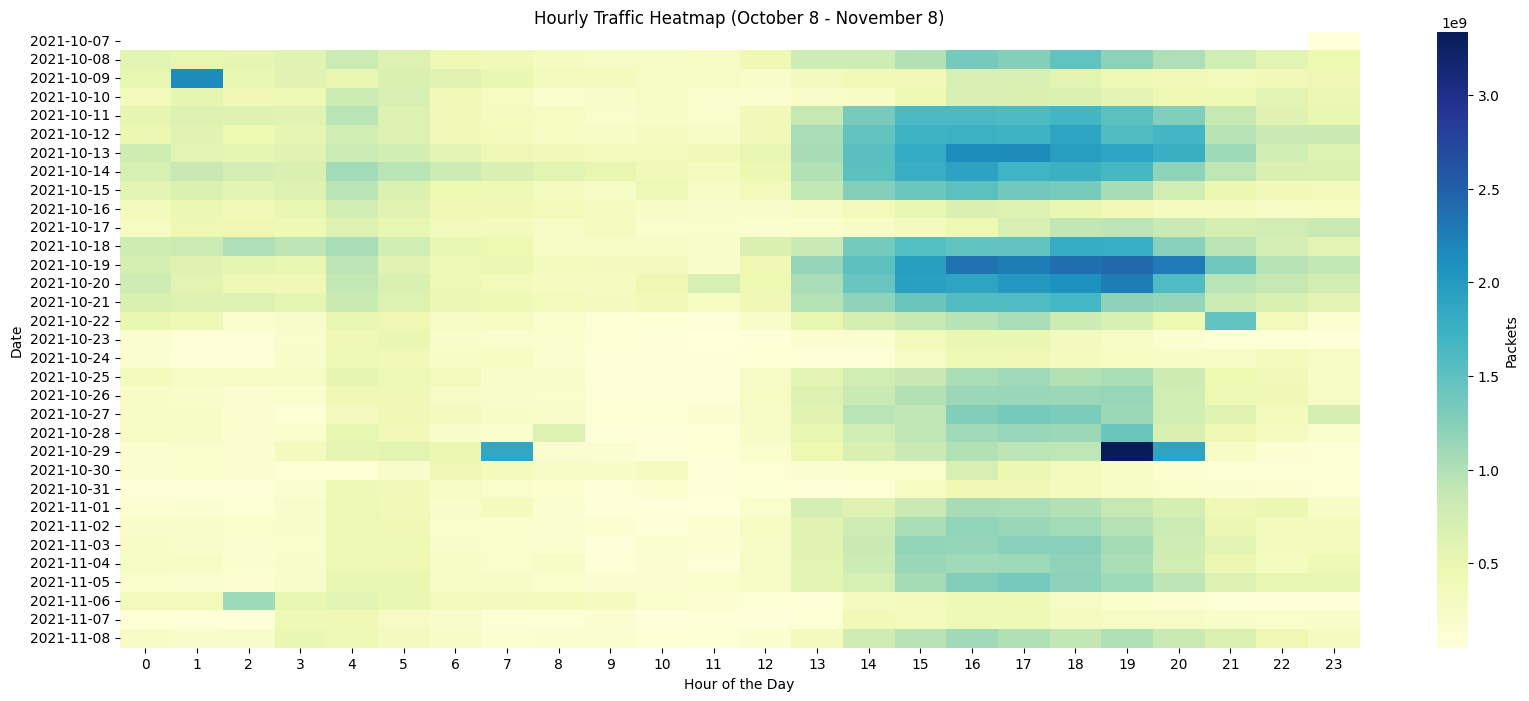

In [12]:
import seaborn as sns
import numpy as np

# Resample to hourly data
hourly_data = df['in_packets'].resample('H').sum()

# Create a new DataFrame with separate day and hour columns
hourly_data_df = hourly_data.reset_index()
hourly_data_df['day'] = hourly_data_df['t_first'].dt.date  # Extract day
hourly_data_df['hour'] = hourly_data_df['t_first'].dt.hour  # Extract hour

# Pivot the data to create a grid with days as rows and hours as columns
traffic_heatmap = hourly_data_df.pivot(index='day', columns='hour', values='in_packets')

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(traffic_heatmap, cmap='YlGnBu', cbar_kws={'label': 'Packets'})
plt.title('Hourly Traffic Heatmap (October 8 - November 8)')
plt.ylabel('Date')
plt.xlabel('Hour of the Day')
plt.show()

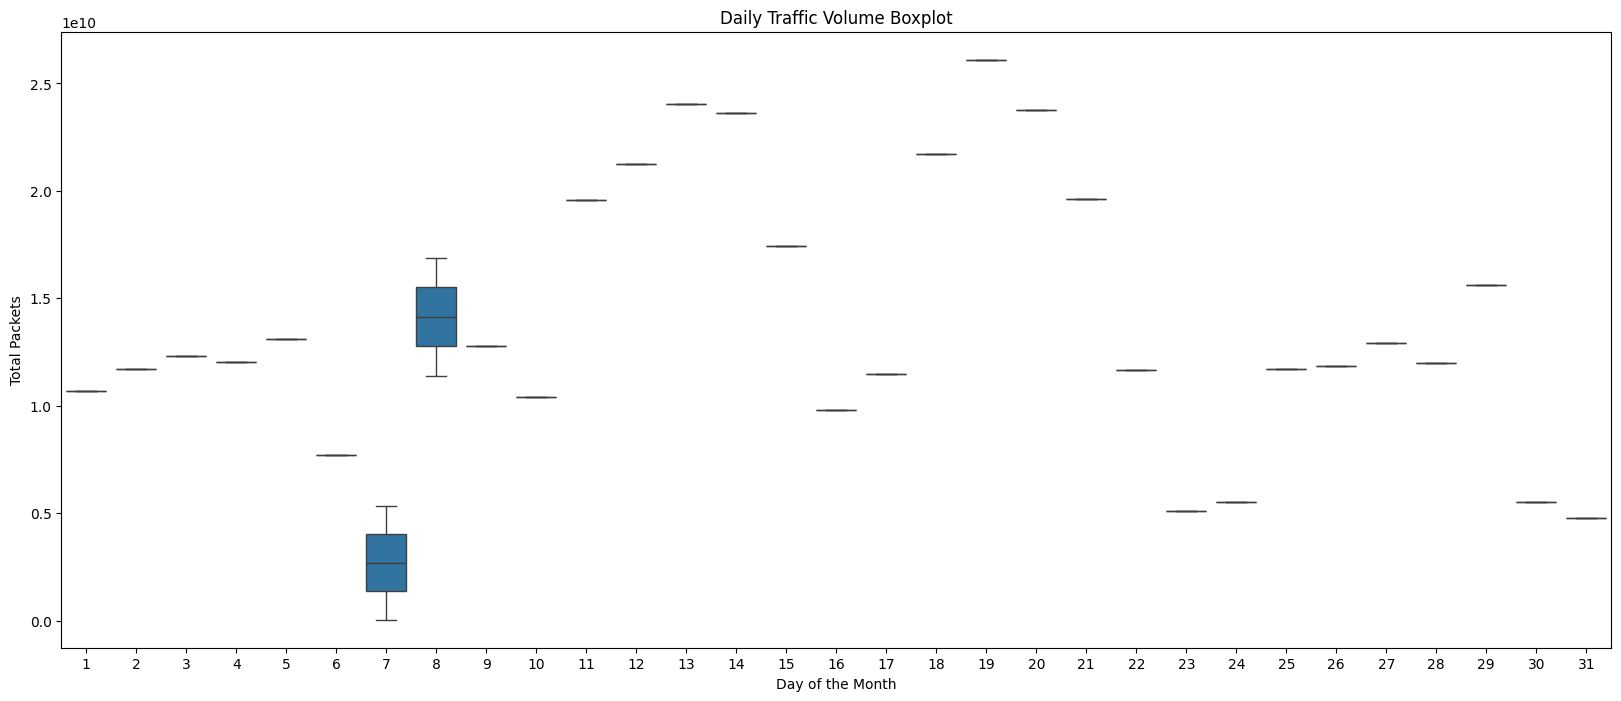

In [13]:
# Resample to daily traffic data and plot boxplot
daily_traffic = df['in_packets'].resample('D').sum()

plt.figure(figsize=(20, 8))
sns.boxplot(x=daily_traffic.index.day, y=daily_traffic.values)
plt.title('Daily Traffic Volume Boxplot')
plt.ylabel('Total Packets')
plt.xlabel('Day of the Month')
plt.show()


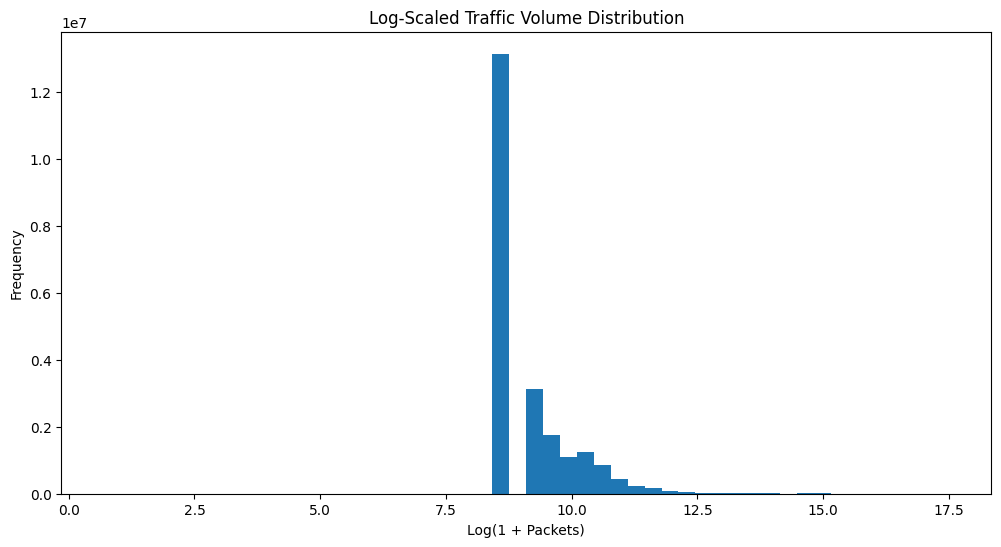

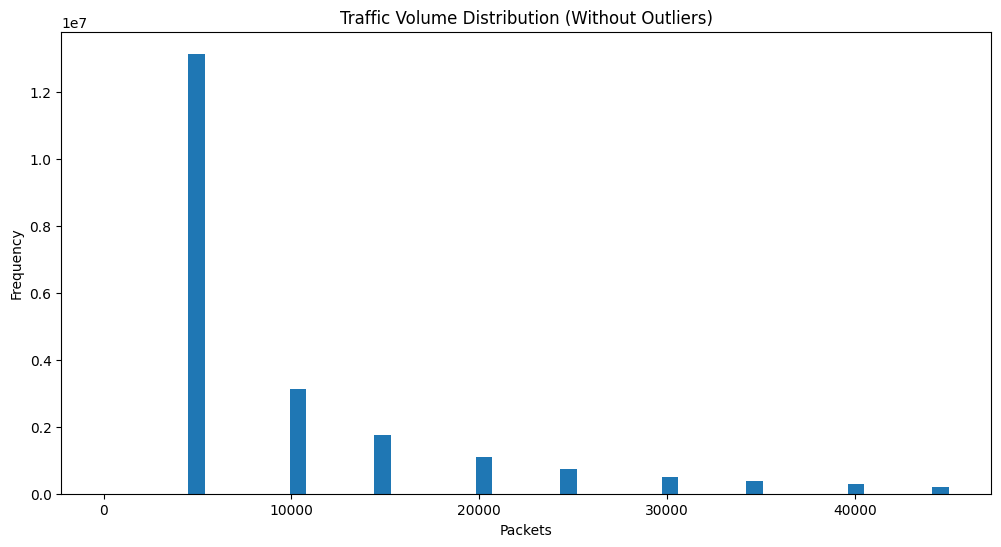

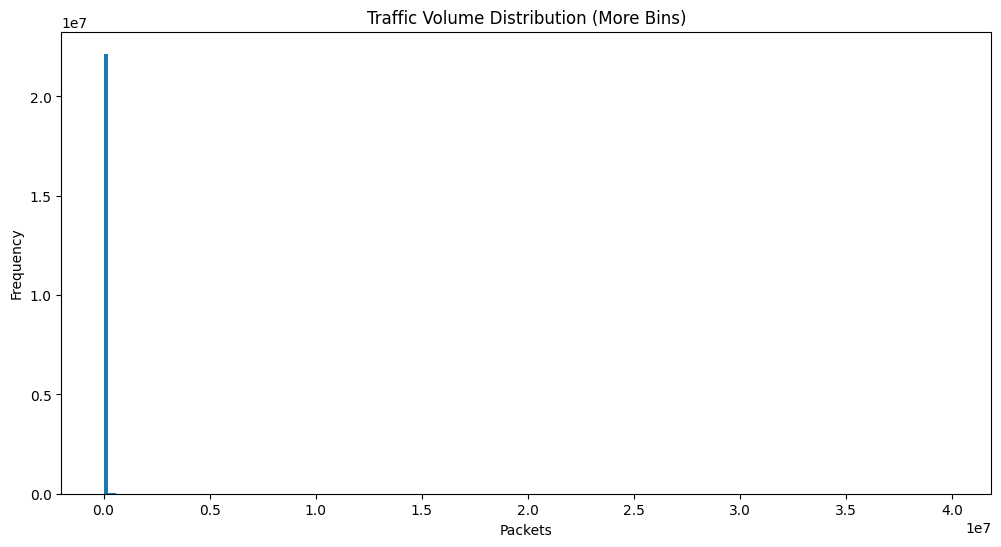

Descriptive Statistics:
count    2.228487e+07
mean     1.972363e+04
std      1.592380e+05
min      1.000000e+00
25%      5.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      3.985000e+07
Name: in_packets, dtype: float64


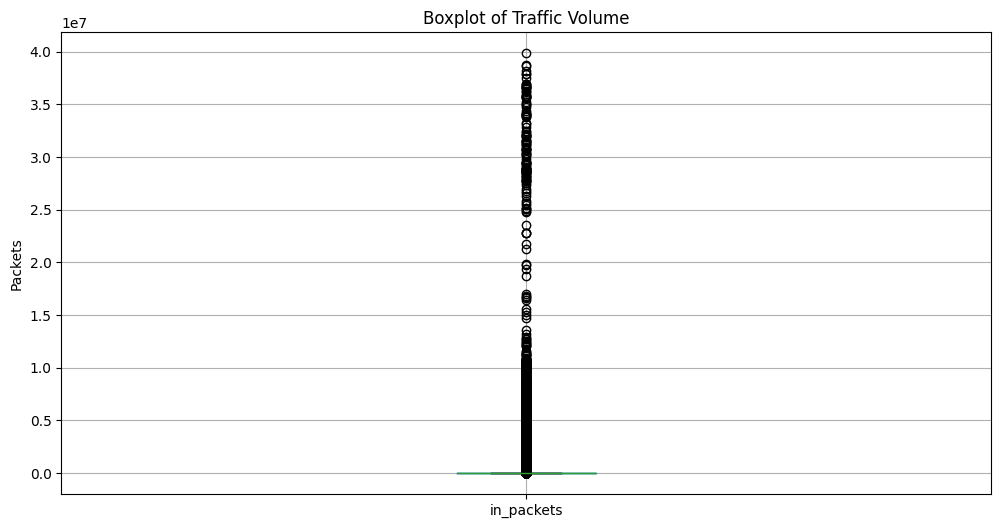

In [14]:

# # Convert 't_first' to datetime and set it as the index
# df['t_first'] = pd.to_datetime(df['t_first'])
# df.set_index('t_first', inplace=True)

# Check for NaN values and fill with 0 if necessary
df['in_packets'] = df['in_packets'].fillna(0)

# 1. Logarithmic Scaling of Traffic Data
plt.figure(figsize=(12, 6))
df['in_packets_log'] = np.log1p(df['in_packets'])  # Apply log scaling
df['in_packets_log'].plot(kind='hist', bins=50, title='Log-Scaled Traffic Volume Distribution')
plt.xlabel('Log(1 + Packets)')
plt.ylabel('Frequency')
plt.show()

# 2. Removing Outliers (95th Percentile)
upper_limit = df['in_packets'].quantile(0.95)  # Get the 95th percentile
df_filtered = df[df['in_packets'] <= upper_limit]  # Filter outliers

# Plot the histogram without outliers
plt.figure(figsize=(12, 6))
df_filtered['in_packets'].plot(kind='hist', bins=50, title='Traffic Volume Distribution (Without Outliers)')
plt.xlabel('Packets')
plt.ylabel('Frequency')
plt.show()

# 3. Increasing Number of Bins in the Histogram
plt.figure(figsize=(12, 6))
df['in_packets'].plot(kind='hist', bins=200, title='Traffic Volume Distribution (More Bins)')
plt.xlabel('Packets')
plt.ylabel('Frequency')
plt.show()

# 4. Descriptive Statistics (to understand data spread)
print("Descriptive Statistics:")
print(df['in_packets'].describe())

# 5. Boxplot of Traffic Volume (to visualize outliers)
plt.figure(figsize=(12, 6))
df.boxplot(column='in_packets')
plt.title('Boxplot of Traffic Volume')
plt.ylabel('Packets')
plt.show()

In [15]:
# Fill missing values with forward fill
hourly_data_ffill = hourly_data.fillna(method='ffill')

# Check again for any remaining missing values
print(hourly_data_ffill.isnull().sum())


0


/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_24814/585055219.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data_ffill = hourly_data.fillna(method='ffill')


<Axes: xlabel='t_first'>

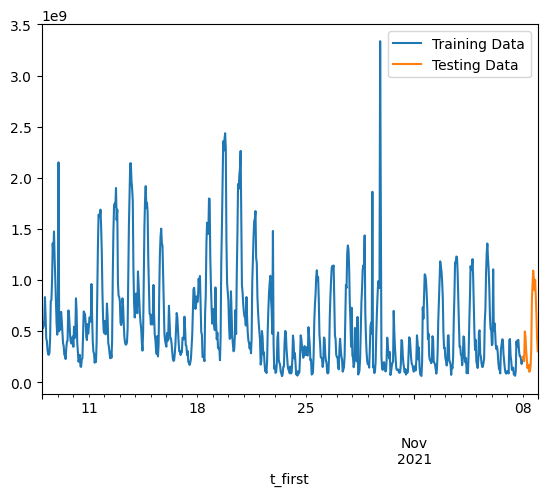

In [16]:
# Define the split point (last day for testing)
train_data = hourly_data_ffill[:-24]  # Training on the first 4 days
test_data = hourly_data_ffill[-24:]   # Testing on the last 24 hours

# Plot to visually check the split
train_data.plot(label='Training Data', legend=True)
test_data.plot(label='Testing Data', legend=True)


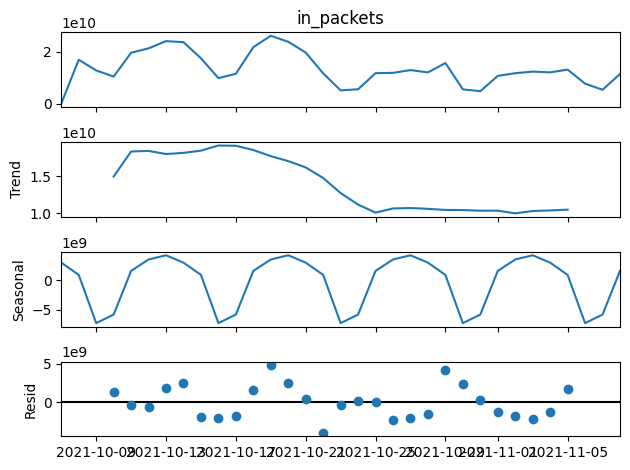

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the data to daily traffic volume for decomposition
daily_data = df['in_packets'].resample('D').sum()

# Decompose the time series
decomposition = seasonal_decompose(daily_data, model='additive', period=7)  # Weekly seasonality

# Plot the decomposed components
decomposition.plot()
plt.show()


Length of daily_data: 33


<Figure size 1200x600 with 0 Axes>

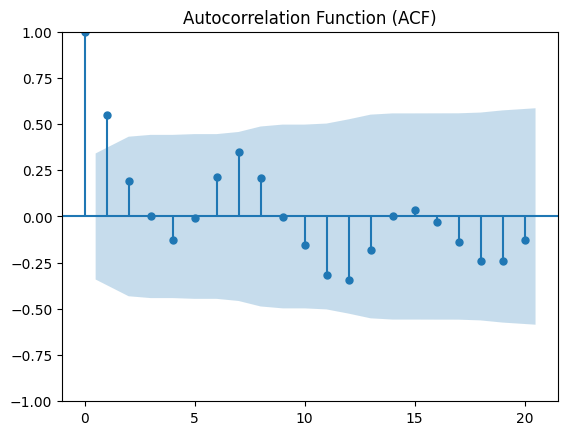

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Check length of data
print(f"Length of daily_data: {len(daily_data)}")

# Clean the data by dropping NaN values
daily_data_clean = daily_data.dropna()

# Set the number of lags (less than the length of data)
lags = min(20, len(daily_data_clean) - 1)

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(daily_data_clean, lags=lags)
plt.title('Autocorrelation Function (ACF)')
plt.show()


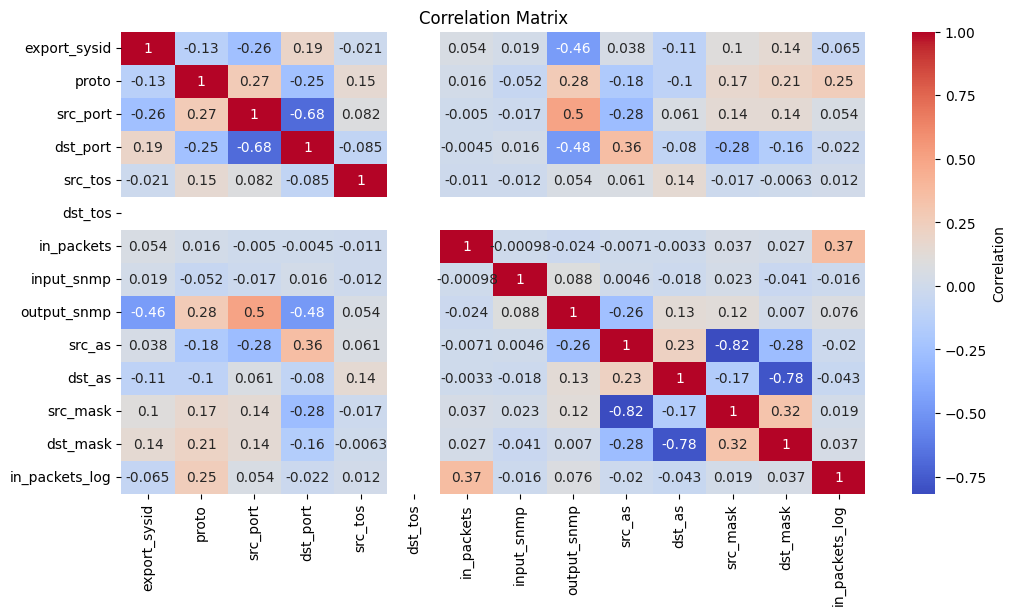

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix using only the numeric columns
correlation_matrix = numeric_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix')
plt.show()


/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_24814/3523250269.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_mean = df['in_packets'].resample('H').sum().rolling(window=24).mean()  # 24-hour rolling mean
/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_24814/3523250269.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_std = df['in_packets'].resample('H').sum().rolling(window=24).std()   # 24-hour rolling std
/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_24814/3523250269.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['in_packets'].resample('H').sum().plot(label='Hourly Traffic')


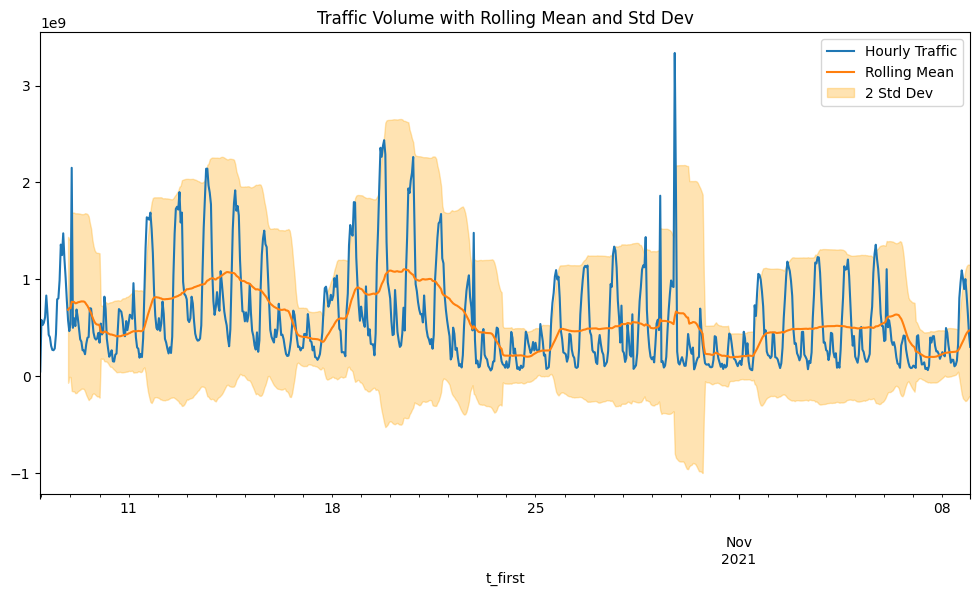

In [21]:
# Rolling window to detect peaks (large increases in traffic volume)
rolling_mean = df['in_packets'].resample('H').sum().rolling(window=24).mean()  # 24-hour rolling mean
rolling_std = df['in_packets'].resample('H').sum().rolling(window=24).std()   # 24-hour rolling std

plt.figure(figsize=(12, 6))
df['in_packets'].resample('H').sum().plot(label='Hourly Traffic')
rolling_mean.plot(label='Rolling Mean')
plt.fill_between(rolling_mean.index, rolling_mean - 2*rolling_std, rolling_mean + 2*rolling_std, color='orange', alpha=0.3, label='2 Std Dev')
plt.legend()
plt.title('Traffic Volume with Rolling Mean and Std Dev')
plt.show()


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Assuming df contains a datetime index and 'in_packets' as the traffic data
# Resample the data to daily traffic volume (or use appropriate time frame)
daily_data = df['in_packets'].resample('H').sum()  # Resample to hourly data

# Prepare the data for Isolation Forest (only numeric values)
# If you have other numeric features, you can add them here
# Example: X = df[['in_packets', 'in_bytes', 'out_packets']].values
X = daily_data.values.reshape(-1, 1)  # Using only 'in_packets' for now

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train Isolation Forest with a higher contamination rate (adjust as necessary)
clf = IsolationForest(contamination=0.05, random_state=42)  # 5% of the data considered anomalous
anomalies = clf.fit_predict(X_scaled)

# Step 3: Convert anomalies: -1 indicates anomaly, 1 indicates normal
anomalies = np.where(anomalies == -1, 1, 0)

# Step 4: Add the anomaly column to the DataFrame
daily_data = daily_data.to_frame()  # Convert Series to DataFrame if needed
daily_data['anomaly'] = anomalies




/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_24814/4023566629.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daily_data = df['in_packets'].resample('H').sum()  # Resample to hourly data


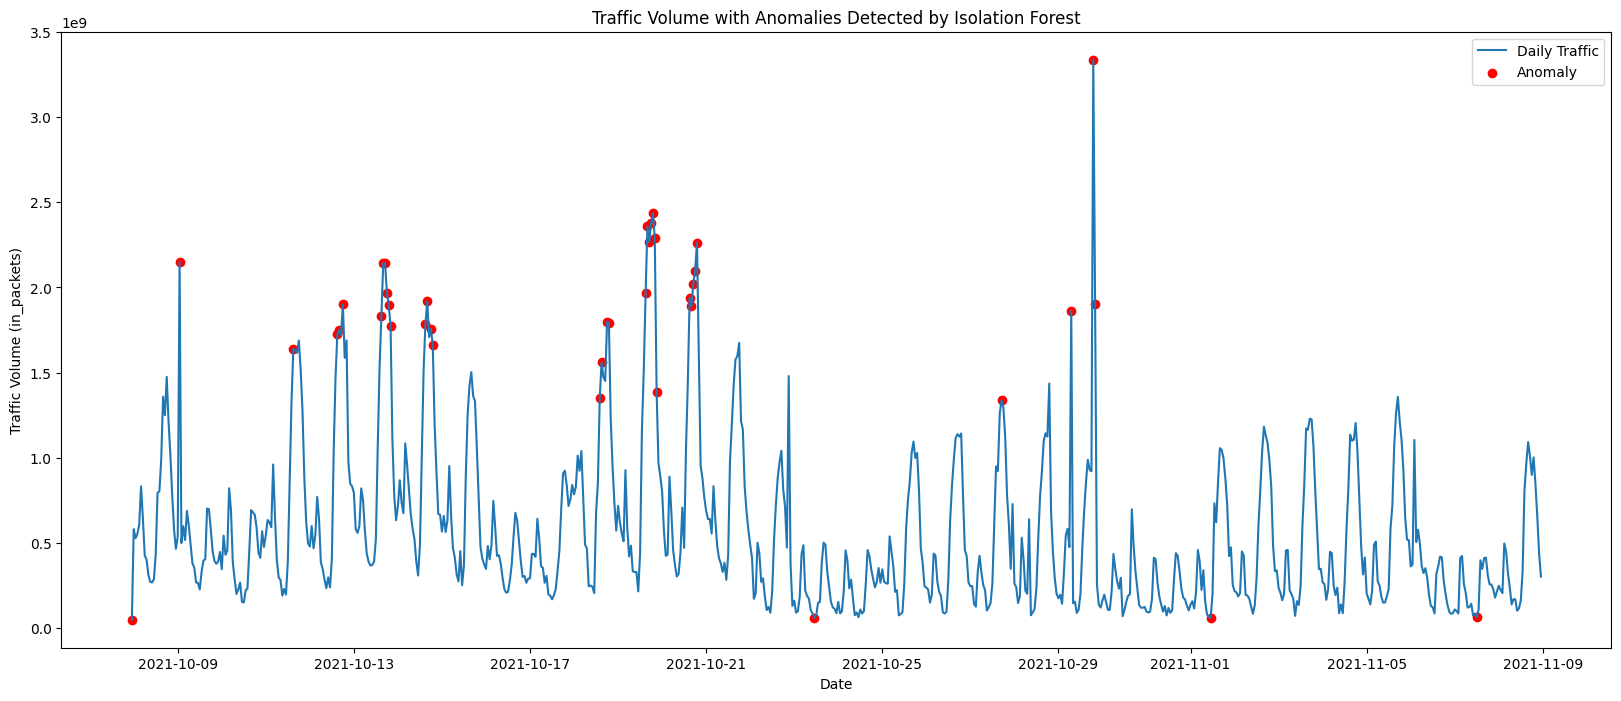

count    7.690000e+02
mean     5.715715e+08
std      4.749794e+08
min      4.996500e+07
25%      2.274400e+08
50%      4.259250e+08
75%      7.775650e+08
max      3.336465e+09
Name: in_packets, dtype: float64


In [48]:
# Step 5: Plot the data and highlight anomalies
plt.figure(figsize=(20, 8))
plt.plot(daily_data.index, daily_data['in_packets'], label='Daily Traffic')
plt.scatter(daily_data.index[daily_data['anomaly'] == 1], daily_data['in_packets'][daily_data['anomaly'] == 1], color='red', label='Anomaly')
plt.title('Traffic Volume with Anomalies Detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Traffic Volume (in_packets)')
plt.legend()
plt.show()

# Optional: Check basic statistics to understand data spread
print(daily_data['in_packets'].describe())

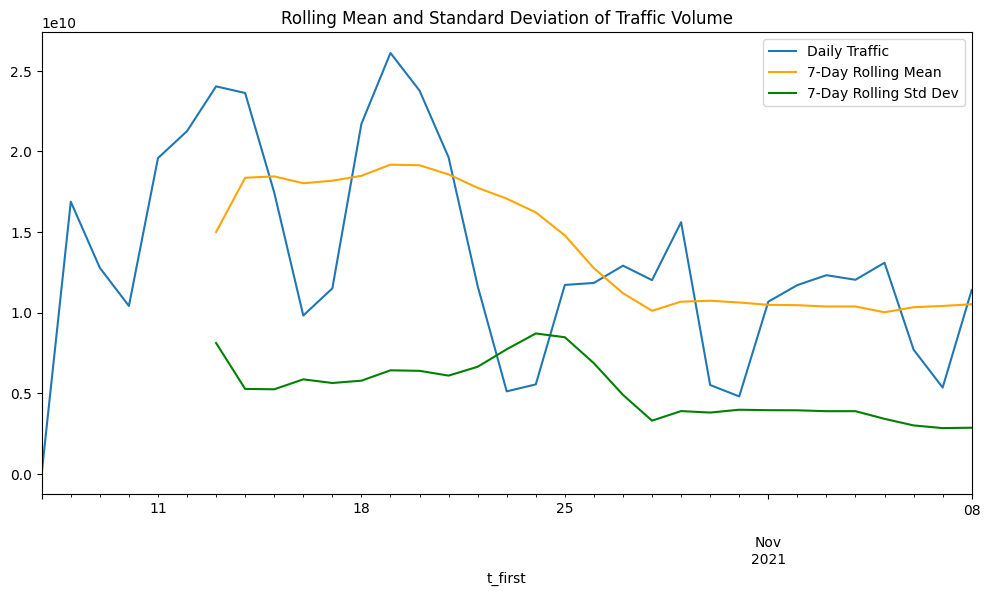

In [27]:
# Rolling mean and standard deviation over a 7-day window
rolling_mean = daily_data.rolling(window=7).mean()
rolling_std = daily_data.rolling(window=7).std()

plt.figure(figsize=(12, 6))
daily_data.plot(label='Daily Traffic')
rolling_mean.plot(label='7-Day Rolling Mean', color='orange')
rolling_std.plot(label='7-Day Rolling Std Dev', color='green')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of Traffic Volume')
plt.show()


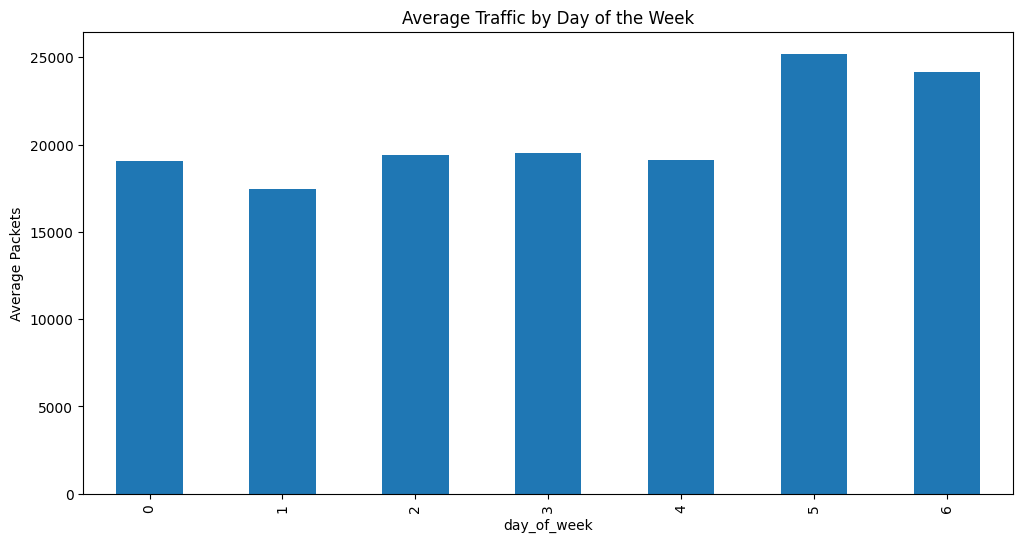

In [28]:
# Create a day of the week column (0 = Monday, 6 = Sunday)
df['day_of_week'] = df.index.dayofweek

# Plot mean traffic for each day of the week
plt.figure(figsize=(12, 6))
df.groupby('day_of_week')['in_packets'].mean().plot(kind='bar', title='Average Traffic by Day of the Week')
plt.ylabel('Average Packets')
plt.show()


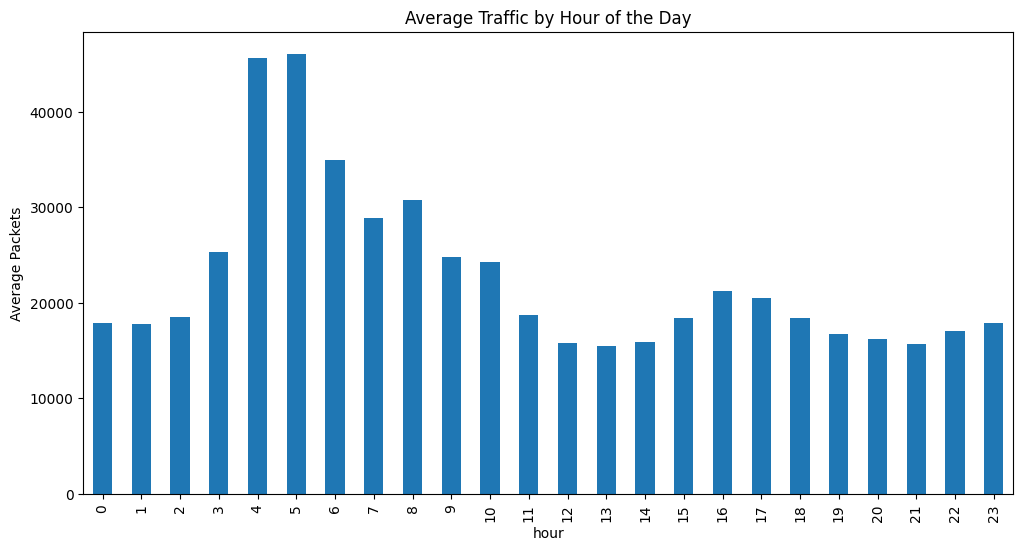

In [29]:
# Create an hour column
df['hour'] = df.index.hour

# Plot mean traffic for each hour of the day
plt.figure(figsize=(12, 6))
df.groupby('hour')['in_packets'].mean().plot(kind='bar', title='Average Traffic by Hour of the Day')
plt.ylabel('Average Packets')
plt.show()
